<a href="https://colab.research.google.com/github/akifkashif/Health-Insurance-Prediction--Capstone-Project/blob/main/Copy_of_Capstone_of_FINAL_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -Akifuddin Kashif**
##### **Team Member 2 -Zeeshan Ahmed**

# **Project Summary -**

# **GitHub Link -**

https://github.com/akifkashif/Health-Insurance-Prediction--Capstone-Project

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset Loading

In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# head of data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# tail of data
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [ ]:
#number of rows and columns
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# getting info from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# getting duplicates
Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates

The Dublicate Values in Dataframe: 


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


#### There are no duplicates in our dataset


### Missing Values/Null Values

In [ ]:
#finding the sum of null values in each column
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###There are no null values in the dataset.

### What did you know about your dataset?

We got to know that Response is the dependent variable in the dataset with values 0 and 1. 0 implies that the customers didn't buy the vehicle insurance subscription and 1 implies the vice versa. We now know that most of the datatypes of the columns are of integers, float and string format. The dataset has 11 independent variables and 381109 number of customer responses towards vehicle insurance. There aren't any null values or missing values in the dataset. There aren't any duplicates pertaining to the column values of the dataset.

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# getting description of the data
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description 

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [ ]:
# getting number of unique values for each column
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?


# **FEATURE ENGINEERING**

In [ ]:
# Categorizing Age feature
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')


In [ ]:
#Splitting the premium based on mean
df['Low_premium'] = df['Annual_Premium']<= df['Annual_Premium'].mean()
df['High_premium'] = df['Annual_Premium']> df['Annual_Premium'].mean()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

Text(0.5, 1.0, 'Response')

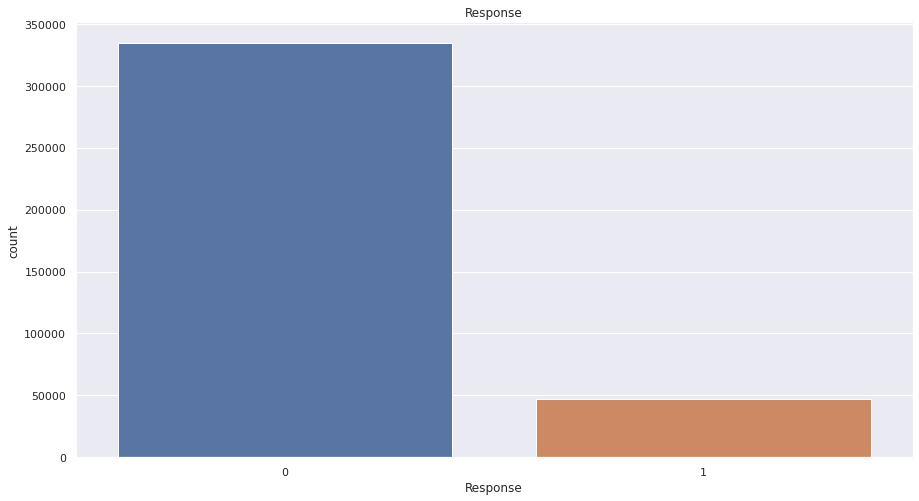

In [ ]:
#Plotting the depedent variable
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Response'])
plt.title('Response')

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

#####There are more number of people who don't prefer to purchase vehicle insurance.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows that there aren't many number of customers who prefer to purchase the vehicle insurance and it can be classified as a negative impact on business.

## Chart - 2

In [ ]:
#Grouping Gender with dependent variable
df_gender =  df.groupby('Gender').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f141a8624f0>],
      dtype=object)

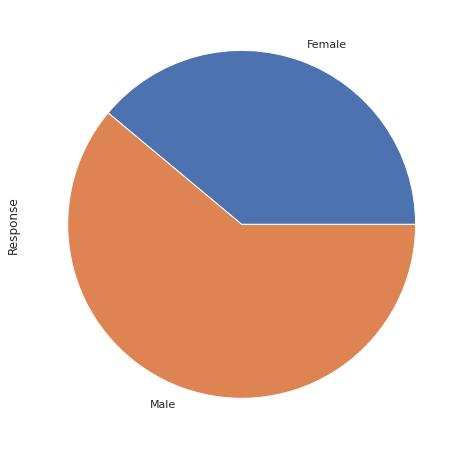

In [ ]:
#plotting the result of groupby
df_gender.plot(kind='pie', subplots=True, figsize=(8, 8))

#### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

#### 2. What is/are the insight(s) found from the chart?

#####From the Pie charts we can conclude Males were more interested in subscribing to Vehicle Insurance.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that most of the customers are males. This is just an insight and typical number seen everywhere in the society. 

## Chart - 3

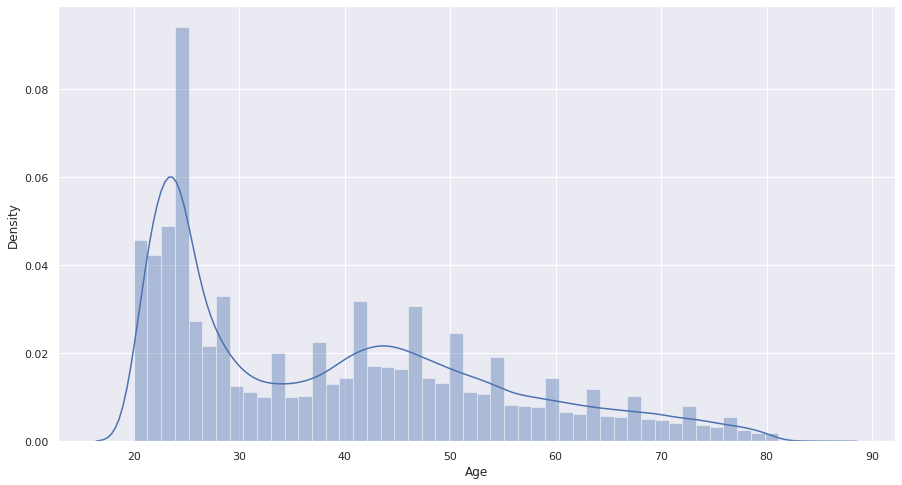

In [ ]:
#visualizing the distribution of Age column
sns.distplot(df['Age'])

#### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

#### 2. What is/are the insight(s) found from the chart?

#####From the above plot we can observe that the customers of age range 23-25 are more in number.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the responses are from age gropus 23-25 so we can target these age groups for a business growth.

## Chart - 4

In [ ]:
df_Age_Group =  df.groupby('Age_Group').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f141a754910>],
      dtype=object)

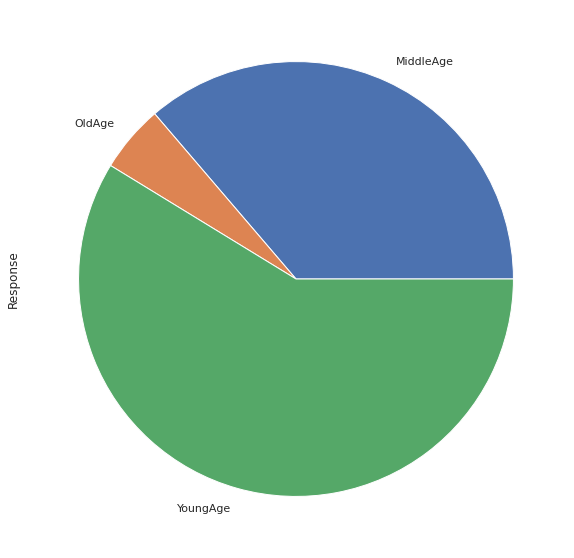

In [ ]:
df_Age_Group.plot(kind='pie', subplots=True, figsize=(10, 10))

#### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

#### 2. What is/are the insight(s) found from the chart?

#####This age group plot has customers who are prospects for Vehicle Insurance. From the plot it is evident that there is a remarkable customer activity regarding Vehicle Insurance from Young Age group as they are more conscious about Vehicle Insurance because of their reckless driving.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Young age group is more responsive towards vehicle insurance and as there are typically more young people in a country, this is a favourable statistic.

## Chart - 5

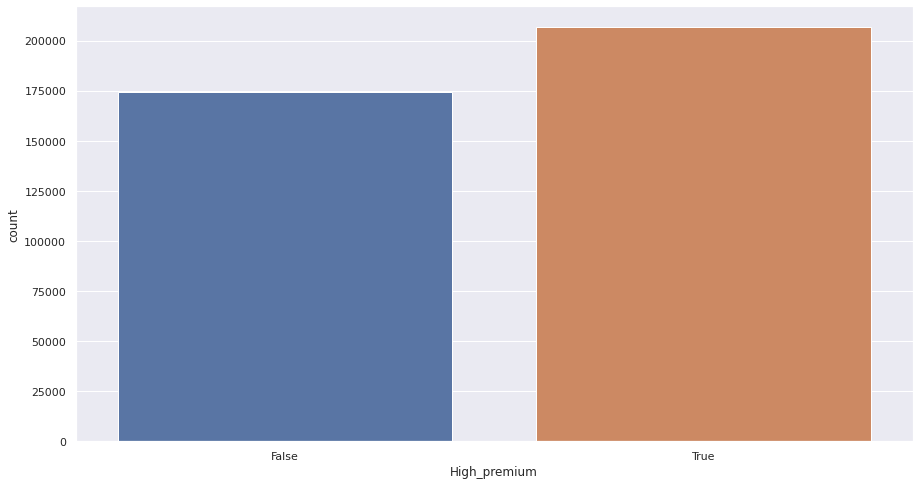

In [ ]:
#plotting the count High premium subscribers
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['High_premium'])

#### 1. Why did you pick the specific chart?

This a countplot from the seaborn library. This plot helps us in getting contrast between two values of a variable.

#### 2. What is/are the insight(s) found from the chart?

#####From the above plot it is evident that people prefer high end premiums than compared low end.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows that among the customers who opted for vehicle insurance most likely prefer the expensive premium and this is a positive thing for the business as it generates more revenue.

## Chart - 6

In [ ]:
#plotting a graph of age who subscribed to Vehicle insurance
df_Age =  df[df['Response']== 1].groupby('Age').count()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fe4c63280>],
      dtype=object)

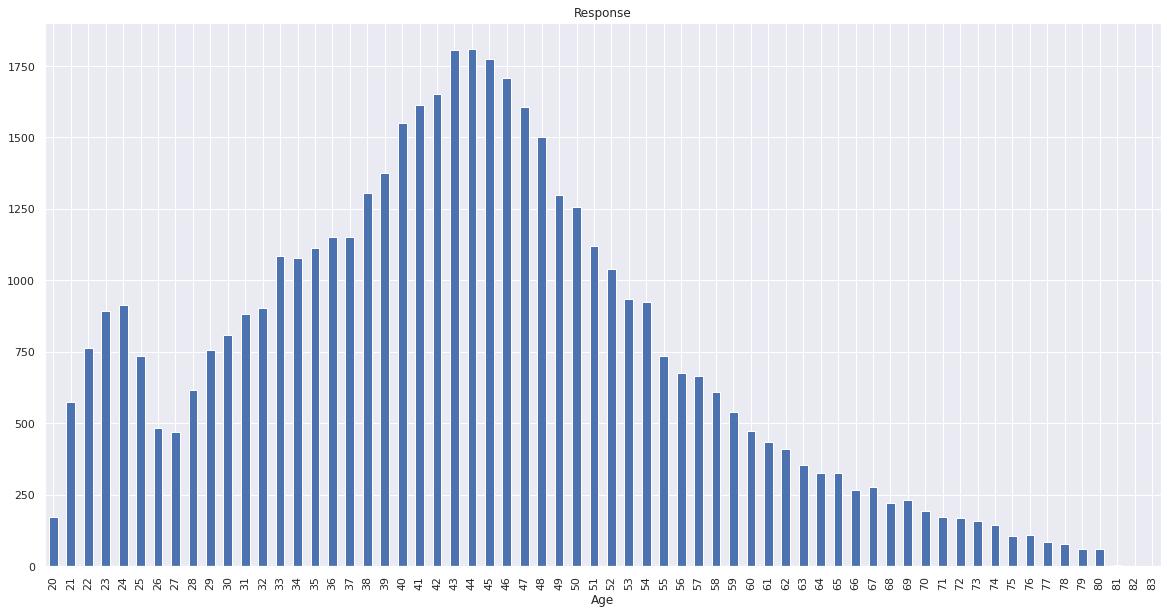

In [ ]:
df_Age.plot(kind='bar', subplots=True, figsize=(20, 10))

#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish values effectively

#### 2. What is/are the insight(s) found from the chart?

#####From the plot it is evident that there is a remarkable response regarding Vehicle Insurance from the Age groups 40 to 48.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The positive responses are from above age groups and these are fairly large in number and we can see that there is a steady increase from age 28

## Chart - 7

In [ ]:
#plotting a graph of age who did not subscribed to Vehicle insurance
df_Age =  df[df['Response']== 0].groupby('Age').count()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fe4b15df0>],
      dtype=object)

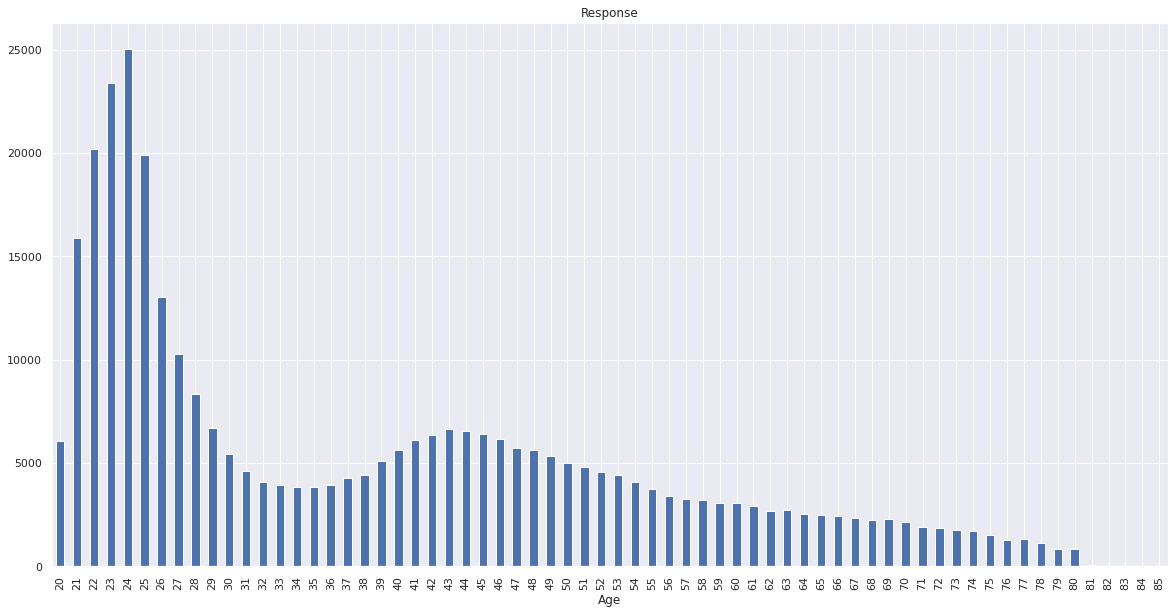

In [ ]:
df_Age.plot(kind='bar', subplots=True, figsize=(20, 10))

#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish  values effectively

#### 2. What is/are the insight(s) found from the chart?

#####From the plot it is evident that there is a negative responses regarding Vehicle Insurance from the Age groups 21 to 25.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The age groups 21 to 25 aren't really interested in the vehicle insurance, the reason might be that they don't have a diving license or aren't aware of the importance of the insurance. This particularly isn't a negative impact as they are still prospects of vehicle insurance.

## Chart - 8

In [ ]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [ ]:
df_License =  df[df['Response']==0].groupby('Driving_License').count()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fe48d60d0>],
      dtype=object)

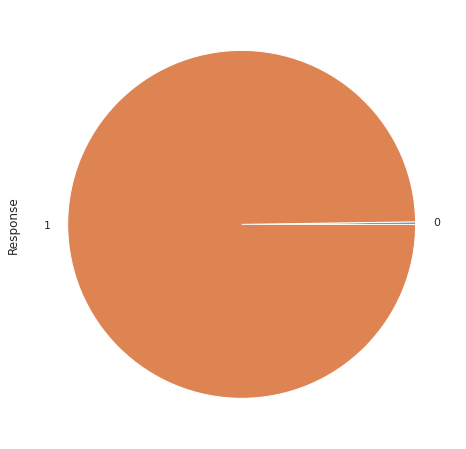

In [ ]:
df_License.plot(kind='pie', subplots=True, figsize=(8, 8))

#### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

#### 2. What is/are the insight(s) found from the chart?

#####No Driving License : 0  Driving License: 1

#####People who posses driving license are more likely to get their vehicle insured than that of the people with no driving license.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is a positive thing because we can predict that the customers who have driving license are more likely to purchase the insurance. The company can actively target the customers who have driving license.

## Chart - 9

In [ ]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [ ]:
df_Previously_Insured =  df[df['Response']==1].groupby('Previously_Insured').count()['Response']

In [ ]:
df_Previously_Insured

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fe4efa4c0>],
      dtype=object)

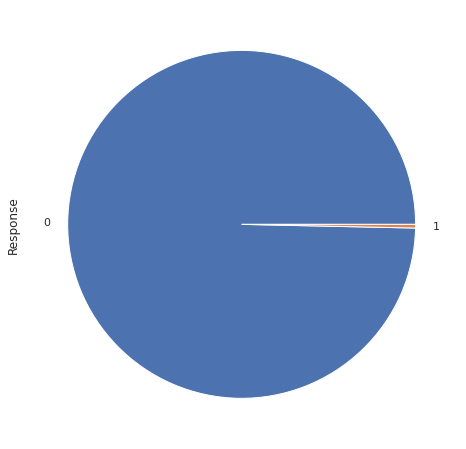

In [ ]:
df_Previously_Insured.plot(kind='pie', subplots=True, figsize=(8, 8))

#### 1. Why did you pick the specific chart?

Piechart is a chart from matplolib library which is really helpful in representing the values occupied by certain values in a variable

#### 2. What is/are the insight(s) found from the chart?

This Pie Chart is about the distribution of number of responses by people who are previously insured and not insured. It suggests that people who are not previously insured almost always opt in for vehicle Insurance.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can actively target the customer who aren't previously vehicle insured as these customers are more likely to not opt in for the vehicle insurance.T

## Chart - 10

# HYPOTHESIS : People who got their vehicle damaged are more likely to buy insurance.

**Null Hypothesis : Vehicle Damage has very little effect on purchasing Insurance**

**Alternate Hypothesis : Vehicle Damage will have a major impact on buying Insurance**

In [ ]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
df_Vehicle_Damage =  df[df['Response']==1].groupby('Vehicle_Damage').count()['Response']

In [ ]:
df_Vehicle_Damage

Vehicle_Damage
No       982
Yes    45728
Name: Response, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fe4e52880>],
      dtype=object)

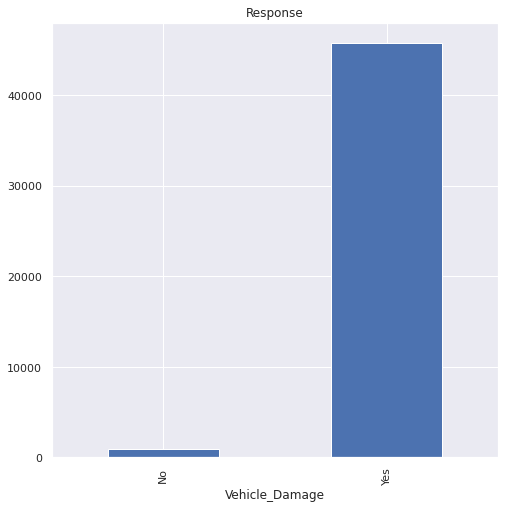

In [ ]:
df_Vehicle_Damage.plot(kind='bar', subplots=True, figsize=(8, 8))

#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish  values effectively

#### 2. What is/are the insight(s) found from the chart?

#####From this plot, we can say that the people who have a damaged vehicle are more inclined to get a vehicle insurance. Hence we reject the null hypothesis here.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can concentrate more on the customers who had their vehicle prone to accidents or damage as this is where the vehicle insurance comes into play.

## Chart - 11

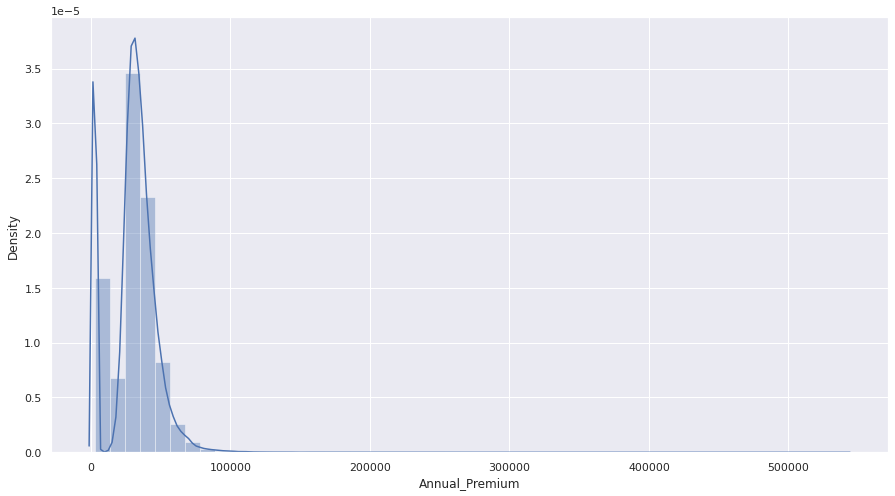

In [ ]:
#Plotting distribution of Annual premium
sns.distplot(df['Annual_Premium'])

#### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

#### 2. What is/are the insight(s) found from the chart?

Most of the customers have their subcription prices around 50,000.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows that among the customers who opted for vehicle insurance most likely prefer the expensive premium and this is a positive thing for the business as it generates more revenue.

## Chart - 12

In [ ]:
df_channels =  df[df['Response']==1].groupby('Policy_Sales_Channel').count()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f85a801c0>],
      dtype=object)

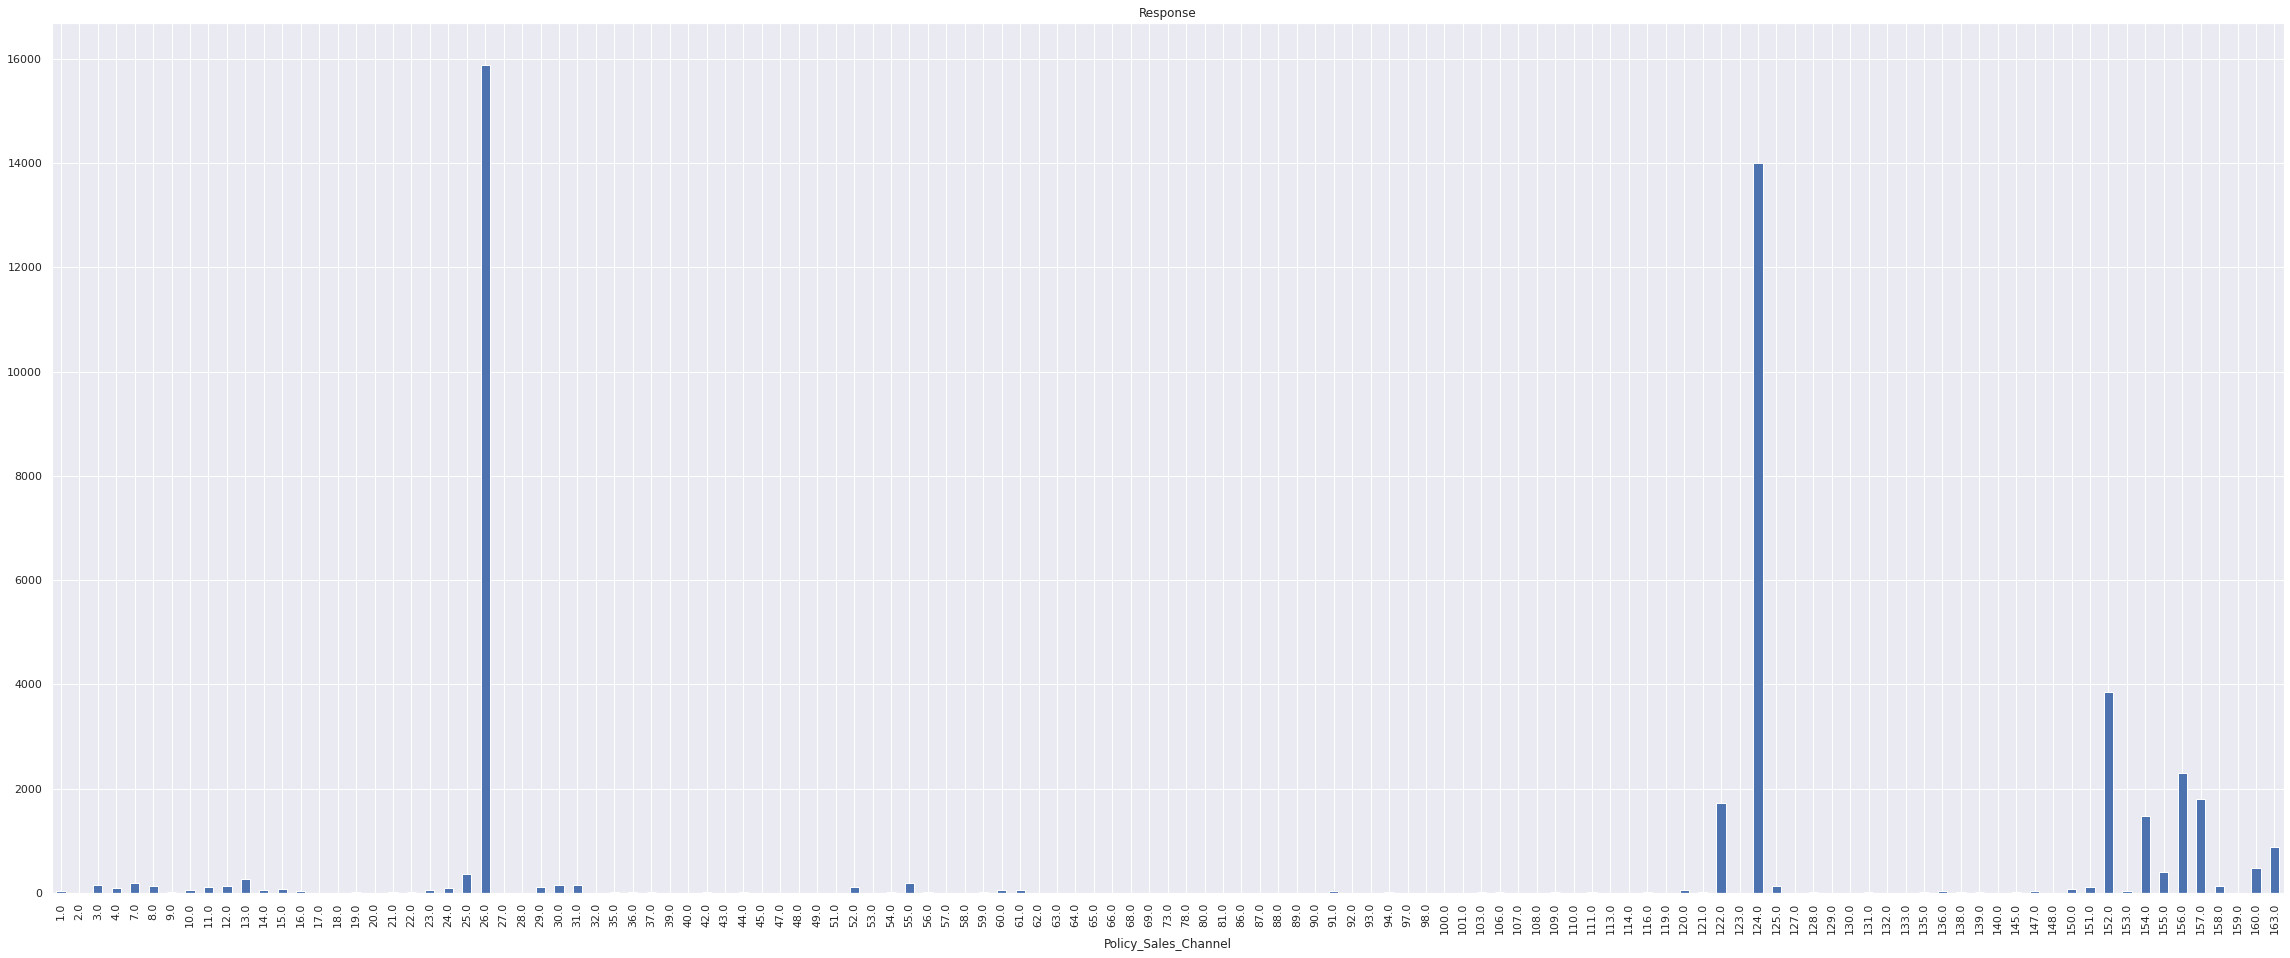

In [ ]:
df_channels.plot(kind='bar', subplots=True, figsize=(40, 16))

#### 1. Why did you pick the specific chart?

BarPlot is a plot from matplotlib library which is similar to the countplot and is used to distinguish  values effectively

#### 2. What is/are the insight(s) found from the chart?

From this line plots, it is clearly evident that the substanstial number of responses are from channels 26 and 124.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can concentrate on the policy channels which produce more prospects for the vehicle insurance subscription.

## Chart - 13

In [ ]:
df['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [ ]:
df_Vintage =  df[df['Response']==1].groupby('Vintage').count()['Response']

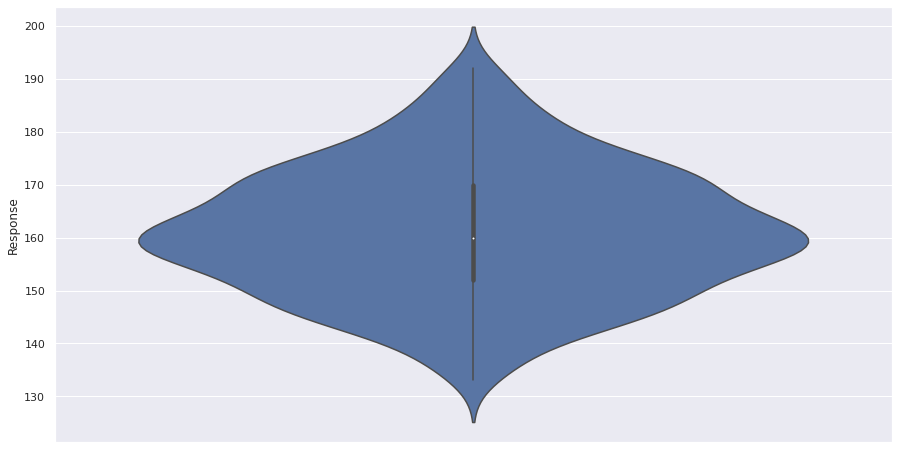

In [ ]:
#plotting a violin plot for vintage
sns.violinplot(y=df_Vintage)

#### 1. Why did you pick the specific chart?

Violin plots are similar to box plots, except that they also show the probability density of the data at different values

#### 2. What is/are the insight(s) found from the chart?

This violinplot suggests that the poisitive responses are high from the customers who are loyal for 150 or more days and it drops after 180 days being a customer.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can increase the vintage of a customers based on what a customer might do after a certain tenure has been completed. Here it can create more offers or incentive after a customer has completed an average of 180 days.

## Chart - 14



In [ ]:
df_Region_code =  df.groupby('Region_Code').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417aa8a00>],
      dtype=object)

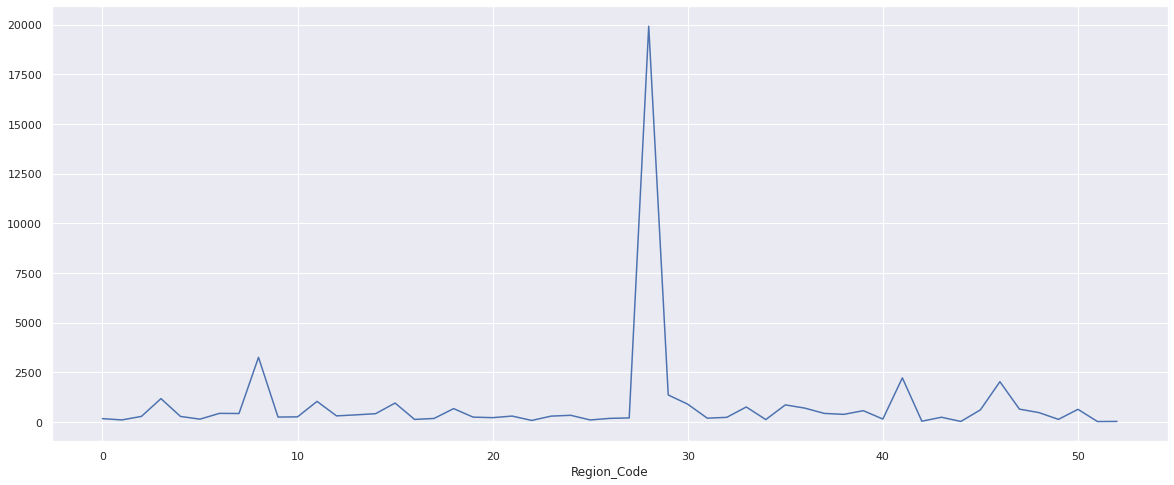

In [ ]:
#plotting a response with respect to region code
df_Region_code.plot(kind='line', subplots=True, figsize=(20, 8))

#### 1. Why did you pick the specific chart?

LinePlot is a plot from matplotlib library which helps in visualization the rate of increment or decrement of a value with respect to another value.

#### 2. What is/are the insight(s) found from the chart?

#####This Line plot shows the positive responses from the customers across all the regions.There is substantial response from the Area code 28 followed by codes 8 and 46.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can keep their crosshairs around the area codes 28, 8, 46 as these areas have more prospects for vehicle insurance.

## Chart - 15

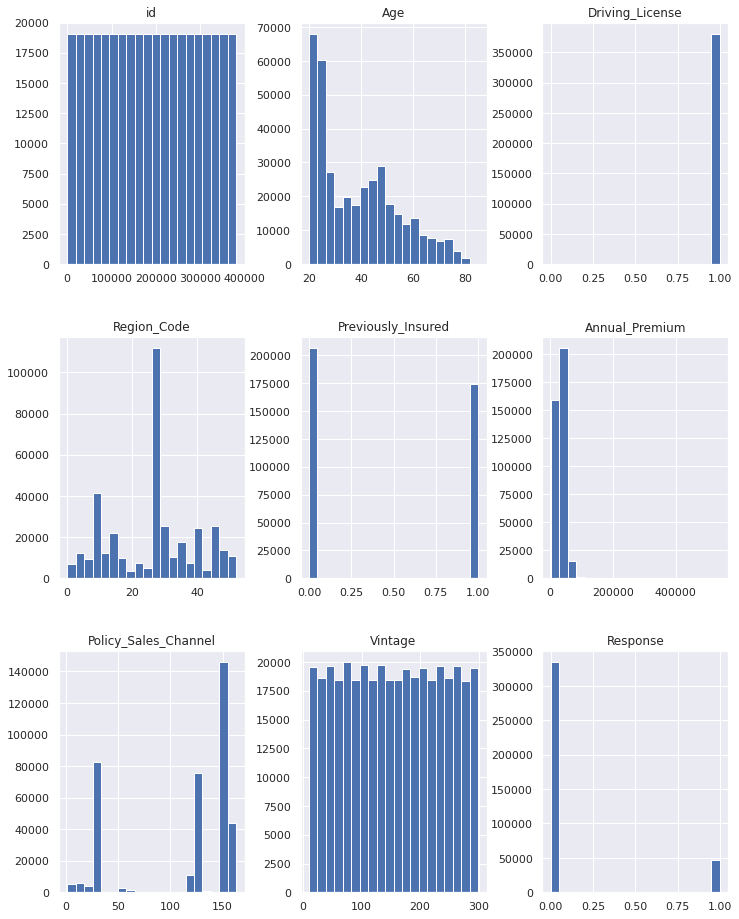

In [ ]:
# Histogram of all the features to understand the distribution
df.hist(bins = 20 , figsize= (12,16)) ;

#### 1. Why did you pick the specific chart?

Histogram is a plot from matplotlib library which really helps getting the distribution of values of a variable

#### 2. What is/are the insight(s) found from the chart?

This shows the distributions of all column values of the dataset.

#### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is just a distribution of column values.

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge


In [ ]:
df1=df.copy()

In [ ]:
df1 = pd.get_dummies(df1,drop_first=False)

In [ ]:
df1.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1,0,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1,1,0,0
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0,0,0,1
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0,0,0,1


## Chart - 16 - Correlation Heatmap

### MULTICOLLINEARITY

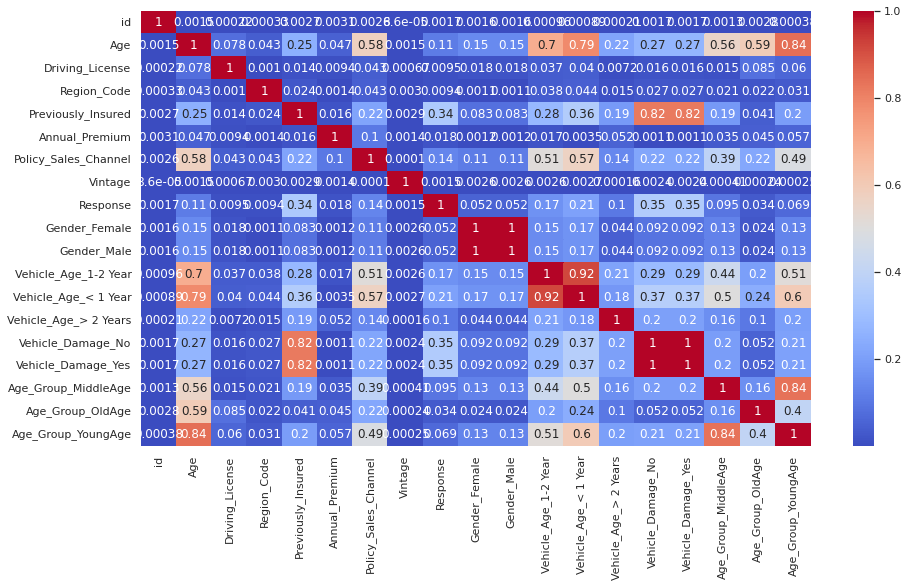

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Calculatig the multicollinearity of all columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Female,inf
9,Gender_Male,inf


In [ ]:
df1.drop(columns = (['Gender_Female']) , inplace =True)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Male,1.033581
9,Vehicle_Age_1-2 Year,inf


In [ ]:
df1.drop(columns = (['Vehicle_Age_> 2 Years']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])


,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Male,1.033581
9,Vehicle_Age_1-2 Year,6.967449


In [ ]:

df1.drop(columns = (['Vehicle_Damage_No']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Male,1.033581
9,Vehicle_Age_1-2 Year,6.967449


In [ ]:
df1.drop(columns = (['Age_Group_YoungAge']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.980635
1,Age,74.061556
2,Driving_License,112.909073
3,Region_Code,4.922475
4,Previously_Insured,5.758097
5,Annual_Premium,5.027569
6,Policy_Sales_Channel,8.466034
7,Vintage,4.378938
8,Gender_Male,2.242046
9,Vehicle_Age_1-2 Year,13.827063


In [ ]:
df1.drop(columns = (['Driving_License']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.919174
1,Age,37.296765
2,Region_Code,4.815570
3,Previously_Insured,5.543370
4,Annual_Premium,4.890389
5,Policy_Sales_Channel,7.782770
6,Vintage,4.300270
7,Gender_Male,2.231319
8,Vehicle_Age_1-2 Year,11.398519
9,Vehicle_Age_< 1 Year,9.848694


In [ ]:
df1.drop(columns = (['Age']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.813963
1,Region_Code,4.618183
2,Previously_Insured,5.179191
3,Annual_Premium,4.641786
4,Policy_Sales_Channel,7.620972
5,Vintage,4.168117
6,Gender_Male,2.195216
7,Vehicle_Age_1-2 Year,8.258193
8,Vehicle_Age_< 1 Year,9.636010
9,Vehicle_Damage_Yes,5.198081


In [ ]:
df1.drop(columns = (['id']), inplace =  True)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,Region_Code,4.602241
1,Previously_Insured,5.145967
2,Annual_Premium,4.619124
3,Policy_Sales_Channel,7.583373
4,Vintage,4.156789
5,Gender_Male,2.192477
6,Vehicle_Age_1-2 Year,7.950969
7,Vehicle_Age_< 1 Year,9.348067
8,Vehicle_Damage_Yes,5.138677
9,Age_Group_MiddleAge,1.942766


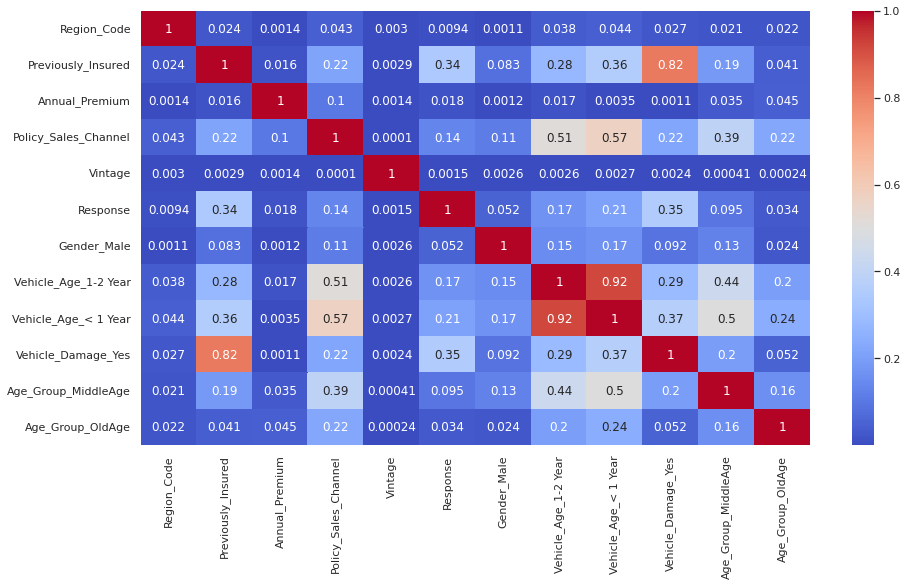

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### 1. Why did you pick the specific chart?

Correlation plot shows the correlation of values with itself and other columns of the dataset through intensity heatmap.

#### 2. What is/are the insight(s) found from the chart?

After dropping the columns whose VIF scores are higher than 10, we plotted the correlation heatmap plot to visualize ideal multicollenearity among the columns.

## Chart - 17 - Pair Plot 

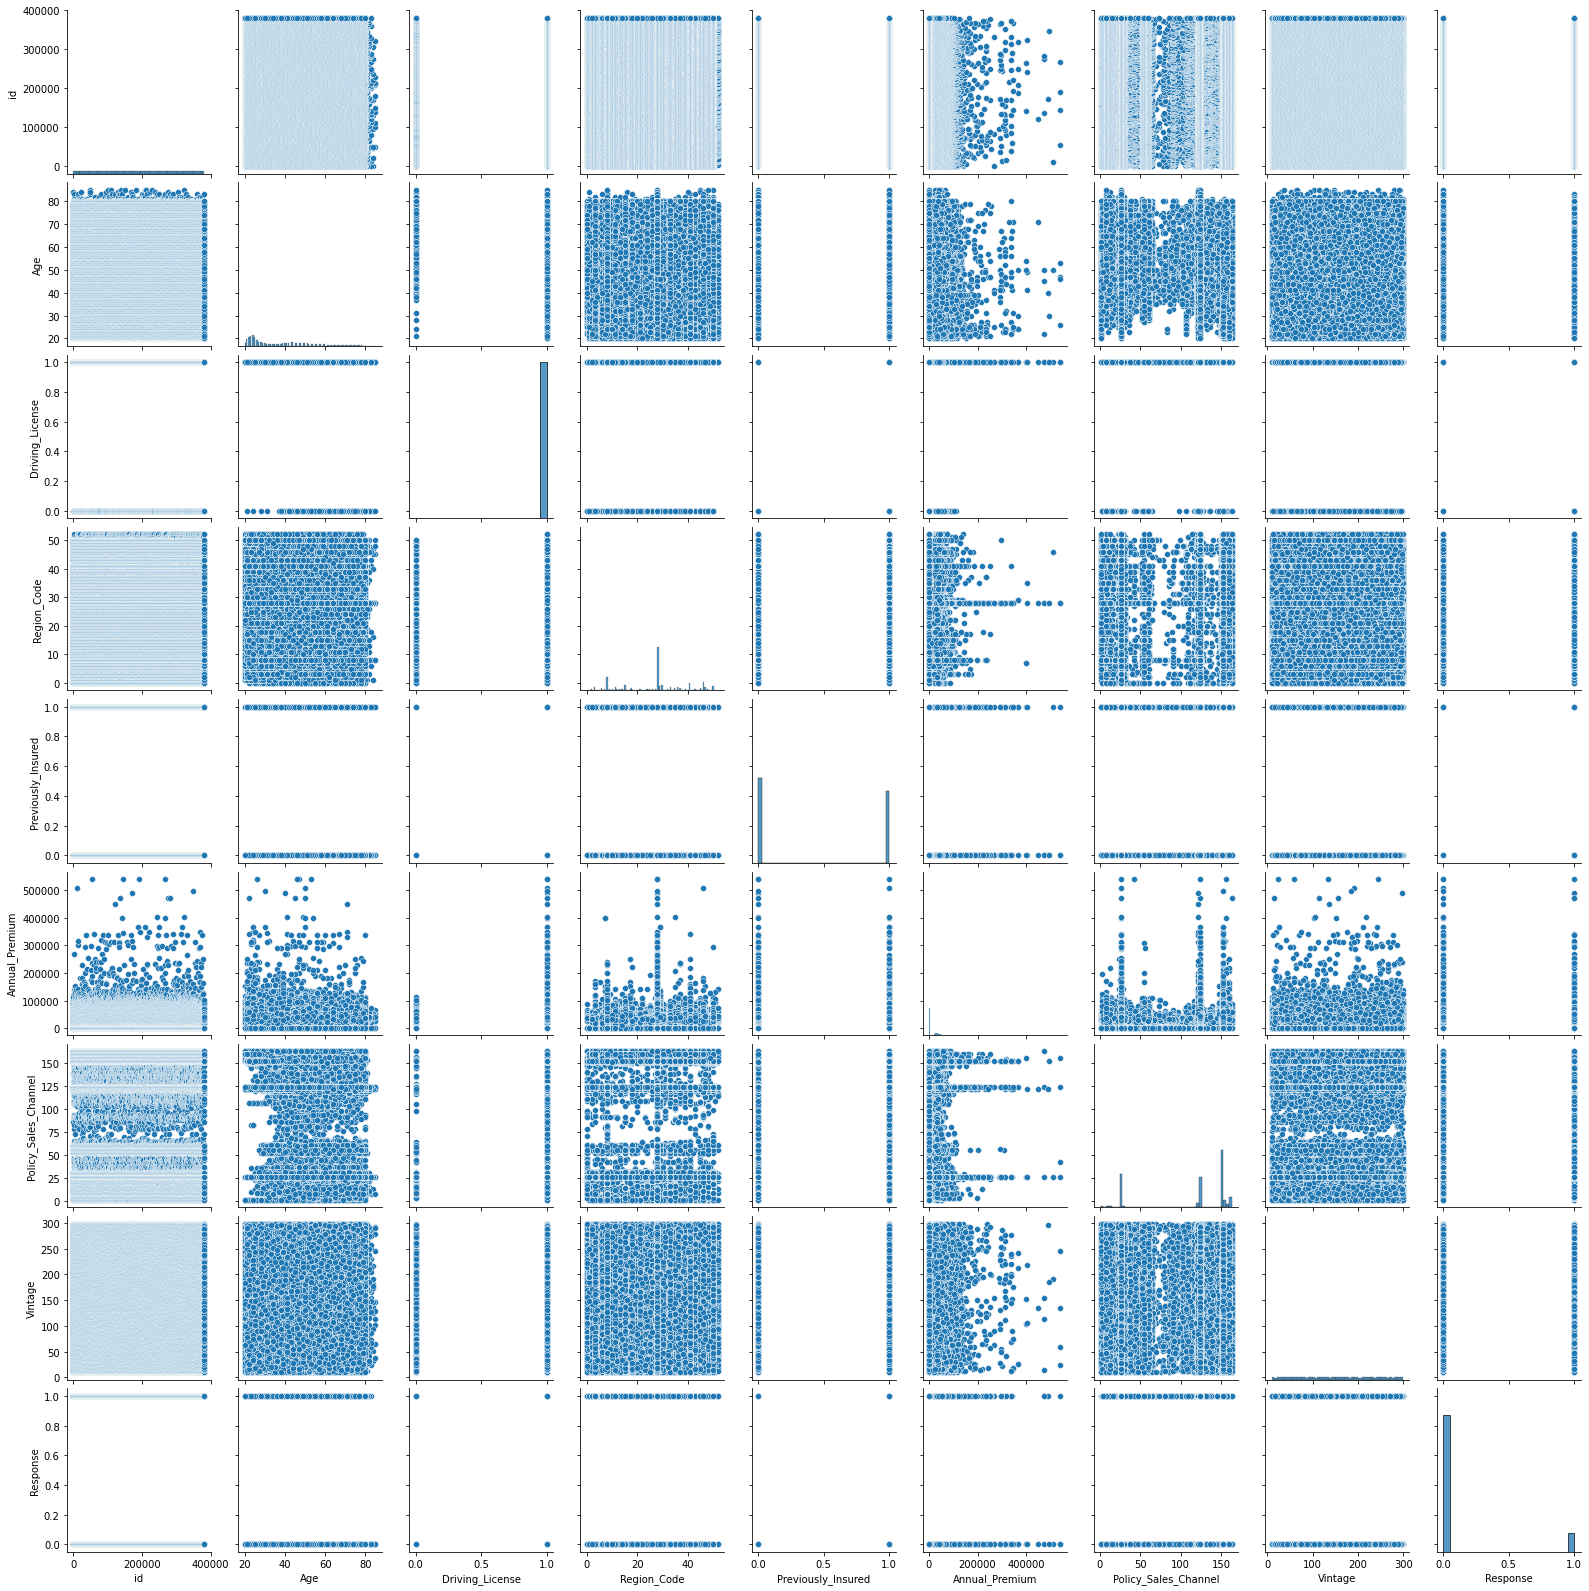

In [ ]:
# Pair Plot visualization
sns.pairplot(df)

#### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

#### 2. What is/are the insight(s) found from the chart?

Pairplot helped us in visualizing the relationship among the columns.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

##  Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

##### There aren't any missing values in our dataset so there isn't a need to handle them.

## Handling Outliers

In [ ]:
# Treating the outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in ['Annual_Premium','Age','Vintage']:
  outliers = find_outliers_IQR(df[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))
  
  outliers

column name is Annual_Premium
number of outliers: 10320
max outlier value: 540165.0
min outlier value: 61893.0
column name is Age
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Vintage
number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
df=df[(df['Annual_Premium'] < 60090.0)]


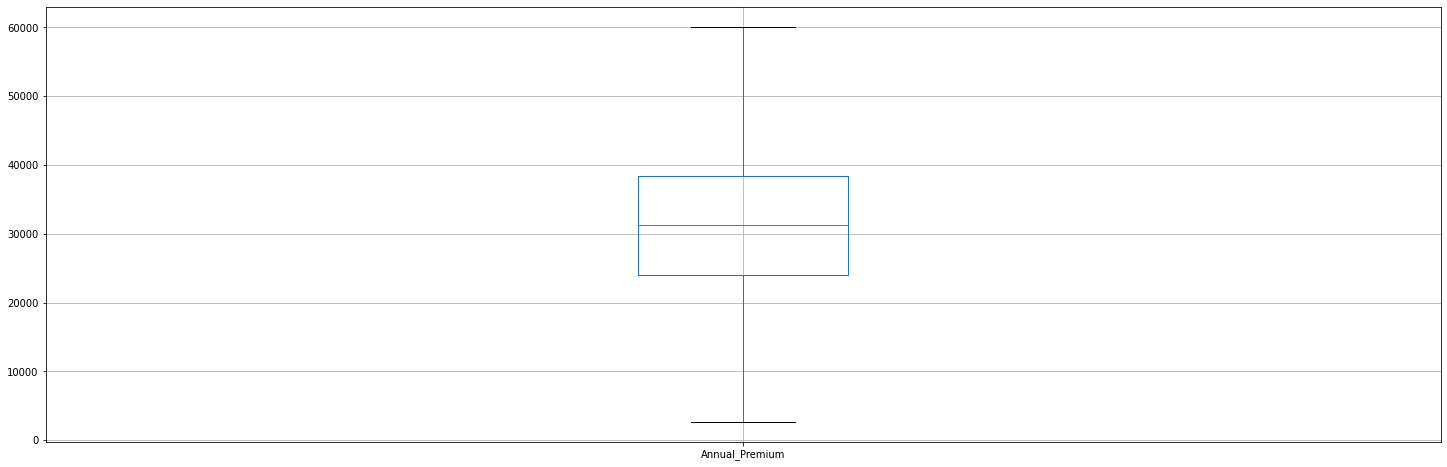

In [ ]:
#plotting boxplot for outlier detection
df.boxplot(column = (['Annual_Premium']),figsize=(25,8))

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the boxplots to visualize the outliers after treating them using Inter Quartile Range method. IQR method is a simple and less computationally intensive technique which really helped us remove outliers.

##  Categorical Encoding

In [ ]:
# df1 = pd.get_dummies(df1,drop_first=False)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used the above code to encode the categorical columns and created dummy variables which will help the model give more accurate predictions. 

##  Feature Manipulation & Selection

###  Feature Manipulation

In [ ]:
# # Categorizing Age feature
# df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')
# #Splitting the premium based on mean
# df['Low_premium'] = df['Annual_Premium']<= df['Annual_Premium'].mean()
# df['High_premium'] = df['Annual_Premium']> df['Annual_Premium'].mean()

###  Feature Selection

In [ ]:
df1.columns

###What all feature selection methods have you used  and why?

We used VIF to remove uncessary features for a better modelling pre-processing.

### Which all features you found important and why?

We selected all the features after encoding the categorical columns and the columns which had VIF scores less than 10.

##  Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Our data doesn't need to be transformed

##  Dimesionality Reduction

#### Do you think that dimensionality reduction is needed? Explain Why?

In our case, Dimesionality Reduction isn't used because the variables are fairly less in number and is of desired dimension

## Handling Imbalanced Dataset

#### Do you think the dataset is imbalanced? Explain Why.

Text(0.5, 1.0, 'Response')

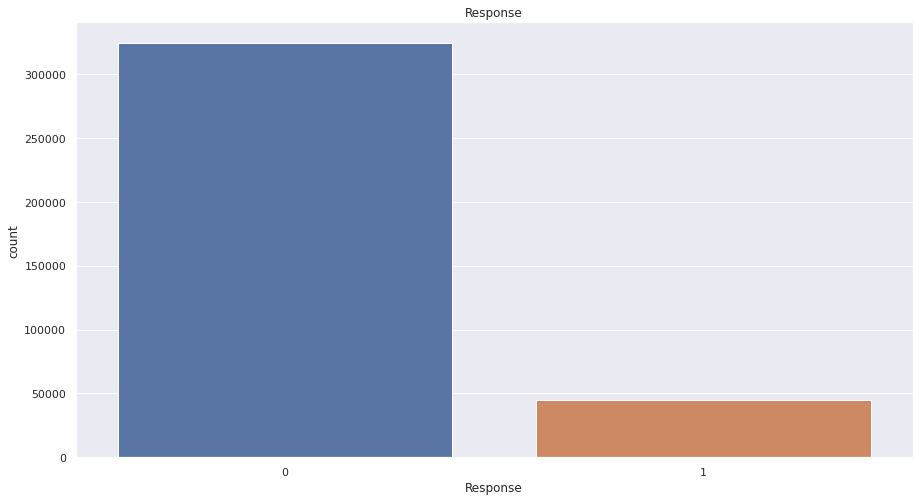

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Response'])
plt.title('Response')

From this plot, it is evident that there is class imbalance i.e, the number of values of 0 are greater than 1. This might hinder the accuracy of ML models so we implement resampling to alleviate it.

#### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Original dataset shape Counter({0: 324161, 1: 44876})
Resampled dataset shape Counter({1: 324161, 0: 324161})


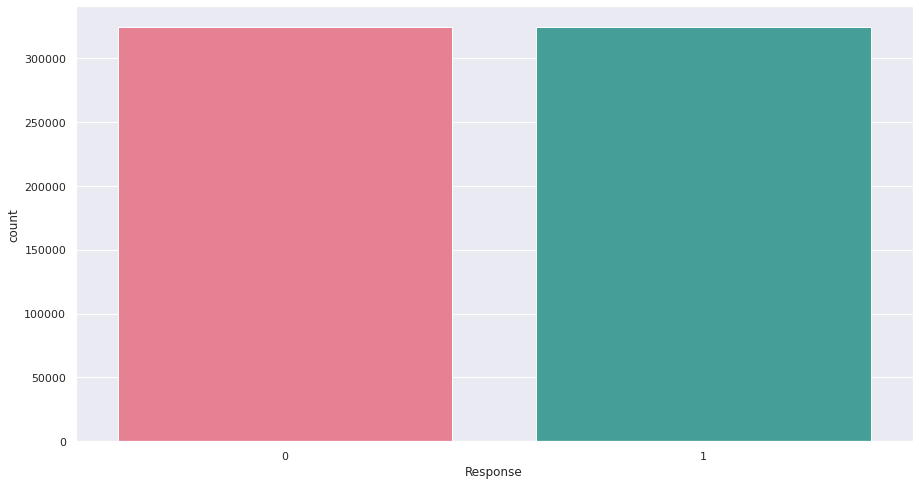

In [ ]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
X_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')
     

We used the RandomOverSampler to create a balance between the two classes so as to not hinder the model performances.

##Data Splitting

In [ ]:
# Creating the data of independent variables
y = df1['Response']

# Create the dependent variable data
X = df1.drop(columns=['Response'],axis=1).values

In [ ]:
#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

### What data splitting ratio have you used and why? 

We allocated 70% of data to train the model and the remaining 30% for test the peformance of the model. 70-30 is ideal because it gives equal emphasis technically to both test and train datasets.

##  Data Scaling

### Which method have you used to scale you data and why?

We used the standardscaler method to scale the data so as to make the values between 0 to 1 and -1 to 1 if the values are negative. This a efficient method with respect to time and resources.

In [ ]:

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(453825, 11) (194497, 11) (453825,) (194497,)


## *** ML Model Implementation***

# Logistic Regression

In [ ]:
model=LogisticRegression()
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.784397702792331
ROC_AUC Score: 0.8299374732237534


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73     60873
           1       0.97      0.71      0.82    133624

    accuracy                           0.78    194497
   macro avg       0.78      0.83      0.78    194497
weighted avg       0.85      0.78      0.79    194497



The F1-scores are fairly good here. The model predicts with an accuracy of 73% in regards to the customer will not opt for the vehicle insurance. The model predicts with an accuracy of 82% in regards to the customer will opt for the vehicle insurance

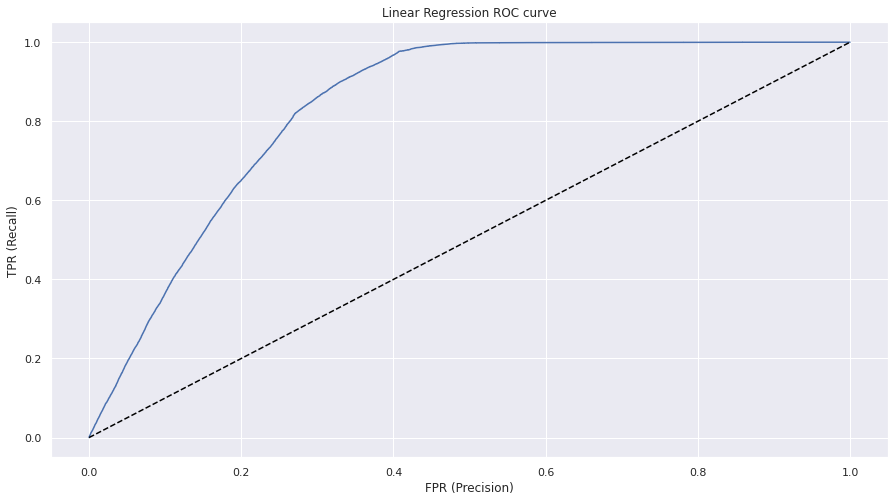

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59934 39797]
 [ 3333 96655]]


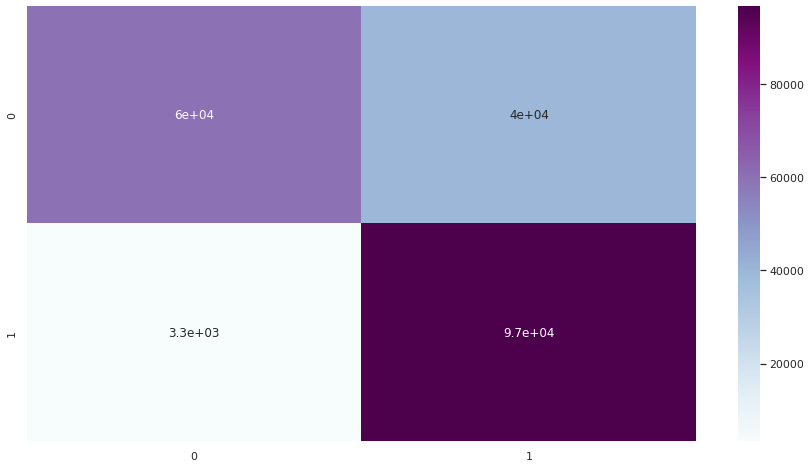

In [ ]:

cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]



AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print(accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

0.9342376038333859
ROC_AUC Score: 0.9410843658550333


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     87345
           1       1.00      0.89      0.94    112374

    accuracy                           0.93    199719
   macro avg       0.93      0.94      0.93    199719
weighted avg       0.94      0.93      0.93    199719



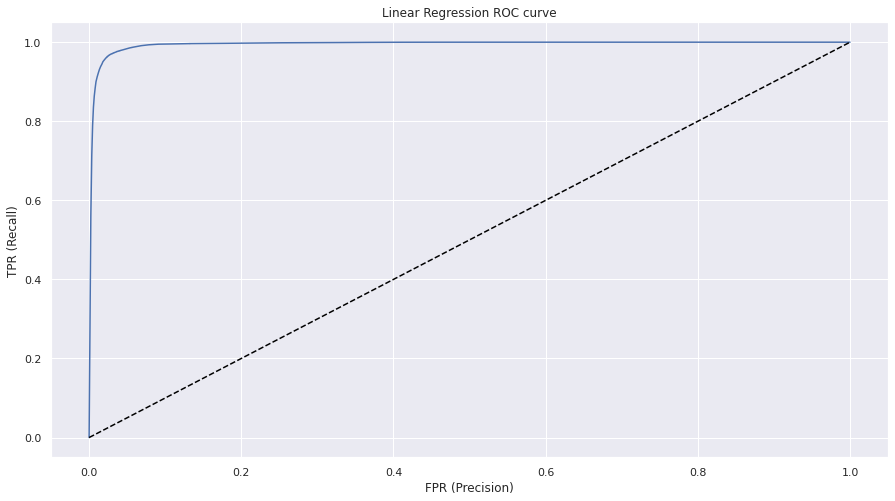

In [ ]:

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Random Forest classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
     

[[86971   374]
 [12760 99614]]


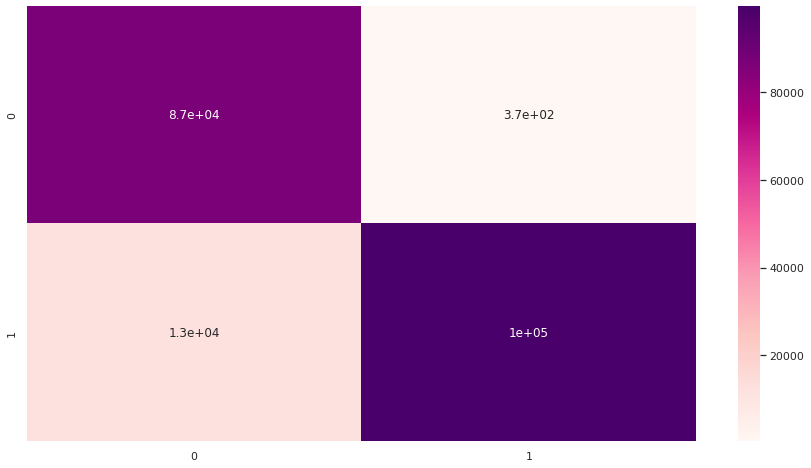

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

The F1-scores are one of the best here. The model predicts with an accuracy of 93% in regards to the customer will not opt for the vehicle insurance. The model predicts with an accuracy of 94% in regards to the customer will opt for the vehicle insurance

### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy is a evaluation metric which shows how accurate the model predicted the positive and negative values among all the positive and negative values. This metric is really important for allocating the resources in all the sections where the model predicted positively.

The precision score is a useful measure of the success of
prediction when the classes are very imbalanced.

Model recall score represents the model’s ability to correctly predict the positives out of actual positives.The higher the recall score, the better the machine learning model is at identifying both positive and negative
examples.

F1-score is a score which gives equal weight to all of the metrics and finds the final score.


# XGBOOST

In [ ]:

from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predict = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.798310513786845
ROC_AUC Score: 0.8281112492026922


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76     67693
           1       0.95      0.73      0.83    126804

    accuracy                           0.80    194497
   macro avg       0.80      0.83      0.79    194497
weighted avg       0.84      0.80      0.80    194497



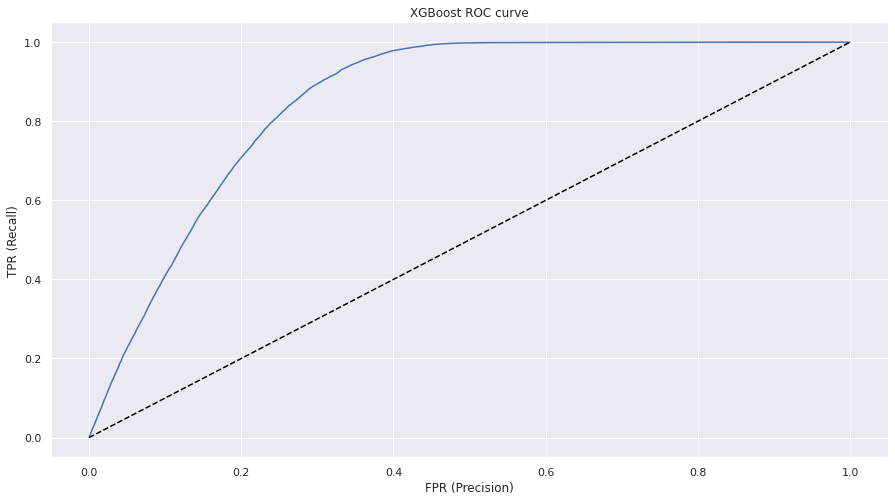

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
     

[[62695 34230]
 [ 4998 92574]]


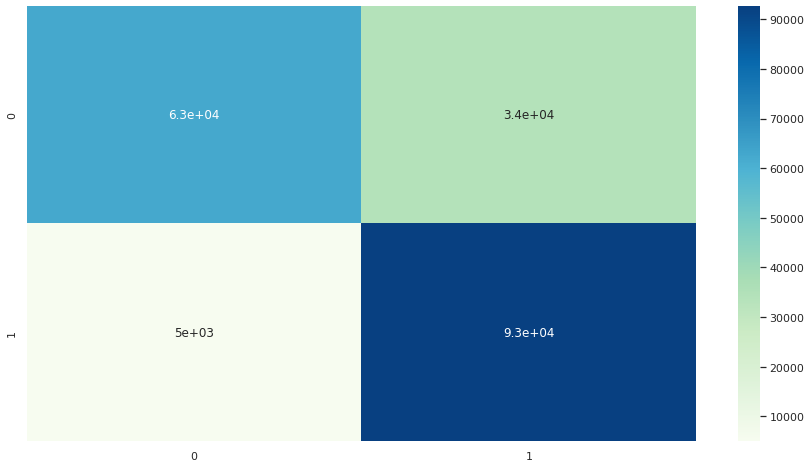

In [ ]:

#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

The F1-scores are really good here. The model predicts with an accuracy of 76% in regards to the customer will not opt for the vehicle insurance. The model predicts with an accuracy of 83% in regards to the customer will opt for the vehicle insurance

# NAIVE BAYES CLASSIFIER

In [ ]:
# training the mdoel

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train,y_train)

predictions_test = sentiment_model.predict(X_test)
predictions_train = sentiment_model.predict(X_train)
acc_naive=accuracy_score(y_test,y_predict)
recall_naive=recall_score(y_test,y_predict)
precision_naive=precision_score(y_test,y_predict)
f1score_naive=f1_score(y_test,y_predict)

AUC_naive=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_naive)

0.7973652982440329
ROC_AUC Score: 0.8271308777160167


In [ ]:

# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))


Train set report


              precision    recall  f1-score   support

           0       0.81      0.67      0.73    233134
           1       0.72      0.84      0.78    232877

    accuracy                           0.76    466011
   macro avg       0.76      0.76      0.75    466011
weighted avg       0.76      0.76      0.75    466011



Test set report


              precision    recall  f1-score   support

           0       0.81      0.67      0.73     99731
           1       0.72      0.84      0.78     99988

    accuracy                           0.76    199719
   macro avg       0.77      0.76      0.76    199719
weighted avg       0.77      0.76      0.76    199719



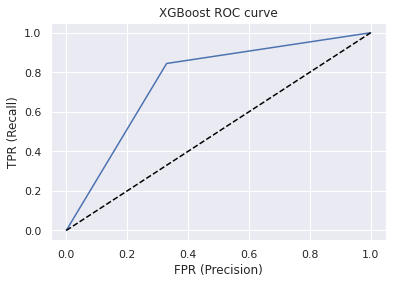

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, predictions_test)

plt.title('NaiveBayes ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[155983  36270]
 [ 77151 196607]]


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

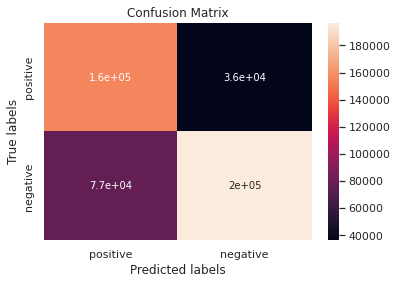

In [ ]:
# getting train set confusion matrix

labels = ['positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We considered the F1-score as the evaluation metric which might go about creating a positive impact on the business. F1-score is the combination of precision and recall and it's really good in determining how  good a model performs. In our case 0 and 1 were responses from customers whether they have opted for vehicel insurance and F1-score metric is used to measure how well a model predicts this phenomena.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose the model Random Forest as the best model from the above created models

Because it accurately predicts whether a customer has opted for vehicel insurance with  the F1-scores of 93% and 94% which are really the best we could have achieved given the irrelevance in the data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

# **Conclusion**

#Conclusion from EDA

● There is a great disparity among positive and negative responses from customers.

● Among the positive responses, males were more interested in purchasing Vehicle Insurance. 

● PolicyHolders between age groups 27-45 were most interested in vehicle insurance 

● Most negative responses are from the age group 23 and 24 years 

● The customers who possess driving licenses almost always purchase vehicle insurance. 

● People who don’t already have a vehicle insurance policy opt in for vehicle Insurance. 

● If the customers’ vehicle is damaged, they definitely will buy vehicle insurance as seen in the data. 

● There is substantial response from Area code 28 followed by codes 8 and 46.

#Conclusion from Machine Learning

● We trained our model on logistic regression and other models .

● Out of all models used , with the Random Forest classification model we were able to get the F1-score of 0.93.

● The model which performed poorly was Naive Bayes Classification model with F1-score of 0.73. Given the size of data and the amount of irrelevance in the data , the above score is good.